In [3]:
import requests
import pandas as pd

from dotenv import load_dotenv
load_dotenv()

import os

In [4]:
import dotenv

geocode_apikey = os.getenv('GEOCODE_API')

# Location

We begin by finding the latitude and longitude of a location

In [5]:
location = "London"

In [11]:
url = f"https://geocode.maps.co/search?q={location}&api_key={geocode_apikey}"

headers = {}

response = requests.request("GET", url, headers=headers)

data = response.json()
lat = data[0]['lat']
lon = data[0]['lon']

print(f"Latitude: {lat}, Longitude: {lon}")

Latitude: 51.5074456, Longitude: -0.1277653


In [7]:
response.headers

{'Date': 'Fri, 19 Apr 2024 10:59:09 GMT', 'Content-Type': 'application/json; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Vary': 'Accept-Encoding', 'Access-Control-Allow-Origin': '*', 'Content-Encoding': 'gzip', 'Last-Modified': 'Fri, 19 Apr 2024 10:59:09 GMT', 'CF-Cache-Status': 'MISS', 'Report-To': '{"endpoints":[{"url":"https:\\/\\/a.nel.cloudflare.com\\/report\\/v4?s=TqsNdIYuzyexDzpYzKctpX2PoVeUcy%2FOclcsV762rAVKVKSF2wYcWvSbiHf4Lnckho%2BtsO1X%2BSywPcAV6xLCNGmnMFA%2B%2FjYbORjkGcc1WsxXBtIOZm1DZuLrj09cVWkyQQ%3D%3D"}],"group":"cf-nel","max_age":604800}', 'NEL': '{"success_fraction":0,"report_to":"cf-nel","max_age":604800}', 'Server': 'cloudflare', 'CF-RAY': '876c622f8f7c5424-TLL'}

# Get the weather data

We are going to use the OpenWeatherMap API to get the weather data for the location we have just geocoded.

In [8]:
url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&current=temperature_2m&hourly=temperature_2m"
payload = {}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

temps = response.json()['hourly']['temperature_2m']
times = response.json()['hourly']['time']
print (times, temps)

['2024-04-19T00:00', '2024-04-19T01:00', '2024-04-19T02:00', '2024-04-19T03:00', '2024-04-19T04:00', '2024-04-19T05:00', '2024-04-19T06:00', '2024-04-19T07:00', '2024-04-19T08:00', '2024-04-19T09:00', '2024-04-19T10:00', '2024-04-19T11:00', '2024-04-19T12:00', '2024-04-19T13:00', '2024-04-19T14:00', '2024-04-19T15:00', '2024-04-19T16:00', '2024-04-19T17:00', '2024-04-19T18:00', '2024-04-19T19:00', '2024-04-19T20:00', '2024-04-19T21:00', '2024-04-19T22:00', '2024-04-19T23:00', '2024-04-20T00:00', '2024-04-20T01:00', '2024-04-20T02:00', '2024-04-20T03:00', '2024-04-20T04:00', '2024-04-20T05:00', '2024-04-20T06:00', '2024-04-20T07:00', '2024-04-20T08:00', '2024-04-20T09:00', '2024-04-20T10:00', '2024-04-20T11:00', '2024-04-20T12:00', '2024-04-20T13:00', '2024-04-20T14:00', '2024-04-20T15:00', '2024-04-20T16:00', '2024-04-20T17:00', '2024-04-20T18:00', '2024-04-20T19:00', '2024-04-20T20:00', '2024-04-20T21:00', '2024-04-20T22:00', '2024-04-20T23:00', '2024-04-21T00:00', '2024-04-21T01:00',

We then use the weather data to create a simple weather report.

In [9]:
df = pd.DataFrame({'time': times, 'temp': temps})

df['time'] = pd.to_datetime(df['time'])

df.set_index('time', inplace=True)

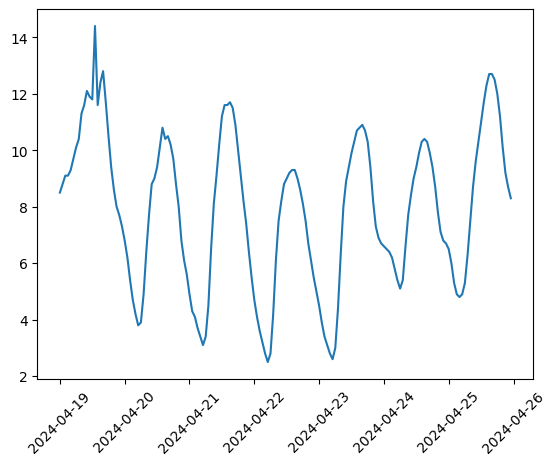

In [10]:
import matplotlib.pyplot as plt

plt.xticks(rotation=45)

plt.plot(df['temp'])